# Data Science with Python
## Week 6 - Mini Project - Public vs. Private Health Expenditure
### *World Development Indicators Dataset*

**_Premilinary Research Question is, is there a relationship (correlation) between country's government and private health expenditure and general people's health conditions?_**

First Step is to load data set then define indicators that suit the research questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data source is https://www.kaggle.com/worldbank/world-development-indicators
data = pd.read_csv('E:/Datasets/world-development-indicators/Indicators.csv')
print(data.shape)
countries = pd.read_csv('E:/Datasets/world-development-indicators/Country.csv')
print(countries.shape)

(5656458, 6)
(247, 31)


In [3]:
# View data frame columns and header
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [18]:
countries.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [5]:
# Explore range of data
print(data['Year'].max())
print(data['Year'].min())

2015
1960


In [6]:
# As regions might be easier to explore than countries, it is better to find out regions from countries data frame
print(countries['Region'].unique())
print(len(countries['Region'].unique()))

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 nan 'North America']
8


In [7]:
# As income groups might be easier to explore than countries, it is better to find out income groups from countries data frame
print(countries['IncomeGroup'].unique())
print(len(countries['IncomeGroup'].unique()))

['Low income' 'Upper middle income' 'High income: nonOECD' nan
 'Lower middle income' 'High income: OECD']
6


In [8]:
# find indicators that include health data (contain 'health' word)
health_filter = data['IndicatorName'].str.contains('health|hospital|physician', case = False)
health_df = data[health_filter]
#health_df.head()
health_indicators = health_df['IndicatorName'].unique().tolist()
health_indicators

['Hospital beds (per 1,000 people)',
 'Physicians (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'Community health workers (per 1,000 people)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'External resources for health (% of total expenditure on health)',
 'Health expenditure per capita (current US$)',
 'Health expenditure per capita, PPP (constant 2011 international $)',
 'Health expenditure, private (% of GDP)',
 'Health expenditure, public (% of GDP)',
 'Health expenditure, public (% of total health expenditure)',
 'Health expenditure, total (% of GDP)',
 'Out-of-pocket health expenditure (% of private expenditure on health)',
 'Out-of-pocket health expenditure (% of total expenditure on health)',
 'Health expenditure, public (% of government expenditure)']

In [9]:
# find indicators that include pollution or CO2 data (contain 'pollution',or 'CO2')
pollution_filter = data['IndicatorName'].str.contains('pollution|CO2', case = False)
pollution_df = data[pollution_filter]
#pollution_df.head()
pollution_indicators = pollution_df['IndicatorName'].unique().tolist()
pollution_indicators

['CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'CO2 intensity (kg per kg of oil equivalent energy use)',
 'CO2 emissions (kg per 2005 US$ of GDP)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 

In [227]:
# find indicators that include life, death, or mortality data (contain 'life', 'death', or 'mortality')
yvar_filter = data['IndicatorName'].str.contains('life|death|mortality|poverty', case = False)
yvar_df = data[yvar_filter]
#yvar_df.head()
yvar_indicators = yvar_df['IndicatorName'].unique().tolist()
yvar_indicators

['Death rate, crude (per 1,000 people)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, under-5 (per 1,000)',
 'Number of infant deaths',
 'Number of under-five deaths',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Poverty headcount ratio at national poverty lines (% of population)',
 'Rural poverty headcount ratio at national poverty lines (% of rural population)',
 'Urban poverty headcount ratio at national poverty lines (% of urban population)',
 'Poverty gap at $1.90 a day (2011 PPP) (%)',
 'Poverty gap at $3.10 a day (2011 PPP) (%)',
 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
 'Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population)',
 'Battle-r

In [11]:
# Find out if there is an entry for world as a whole
world_filter = data['CountryName'].str.contains('world', case = False)
world_df = data[world_filter]
#world_df.head()
list_world = world_df['CountryName'].unique()
list_world

array(['Arab World', 'World'], dtype=object)

**There is a world entry in the country name, which means it can be used in addition to regions, there is also Arab World which is different from MENA (Middle East and North Africa) Region**

In [228]:
# put all indicators to be used in one data frame
df = data[health_filter | yvar_filter | pollution_filter | world_filter]
df.tail()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656409,Zimbabwe,ZWE,"Mortality rate, under-5, male (per 1,000 live ...",SH.DYN.MORT.MA,2015,76.1
5656410,Zimbabwe,ZWE,Number of infant deaths,SH.DTH.IMRT,2015,25398.0
5656411,Zimbabwe,ZWE,Number of maternal deaths,SH.MMR.DTHS,2015,2400.0
5656412,Zimbabwe,ZWE,Number of neonatal deaths,SH.DTH.NMRT,2015,12836.0
5656413,Zimbabwe,ZWE,Number of under-five deaths,SH.DTH.MORT,2015,38087.0


In [229]:
#check amount of data filtered
df.shape

(404736, 6)

**Compare private to public health expenditures in Canada and the United States**

In [86]:
CanUS_filter = ['Canada', 'United States']
Ind1_filter = ['Health expenditure, private (% of GDP)', 'Health expenditure, public (% of GDP)']
df_1 = df.loc[(df['CountryName'].isin(CanUS_filter)) & (df['IndicatorName'].isin(Ind1_filter))]
df_1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6455,Canada,CAN,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,0.793684
6456,Canada,CAN,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,192895.201000
6457,Canada,CAN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,10.770847
6458,Canada,CAN,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,13.346571
6459,Canada,CAN,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,11.174268


In [54]:
df_2 = pd.pivot_table(df_1, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
df_2

Value  \
IndicatorName      Health expenditure, private (% of GDP)   
CountryName   Year                                          
Canada        1995                               2.547848   
              1996                               2.524237   
              1997                               2.570977   
              1998                               2.598451   
              1999                               2.622211   
              2000                               2.570135   
              2001                               2.730965   
              2002                               2.855655   
              2003                               2.846071   
              2004                               2.836037   
              2005                               2.849039   
              2006                               2.938795   
              2007                               2.919347   
              2008                               2.947304   
              2009                               3.234456   
              2010                               3.248837   
              2011                               3.221686   
              2012                               3.272617   
              2013                               3.280067   
United States 1995                               7.229758   
              1996                               7.218143   
              1997                               7.205432   
              1998                               7.381947   
              1999                               7.446799   
              2000                               7.485655   
              2001                               7.722772   
              2002                               8.203039   
              2003                               8.520125   
              2004                               8.508763   
              2005                               8.500983   
              2006                               8.451537   
              2007                               8.591017   
              2008                               8.714021   
              2009                               9.030803   
              2010                               8.981418   
              2011                               9.016683   
              2012                               9.042650   
              2013                               9.046722   

                                                          
IndicatorName      Health expenditure, public (% of GDP)  
CountryName   Year                                        
Canada        1995                              6.313500  
              1996                              6.112419  
              1997                              6.033112  
              1998                              6.228971  
              1999                              6.107698  
              2000                              6.098427  
              2001                              6.364905  
              2002                              6.514306  
              2003                              6.694244  
              2004                              6.719902  
              2005                              6.723560  
              2006                              6.778649  
              2007                              6.874479  
              2008                              7.041258  
              2009                              7.888175  
              2010                              7.863970  
              2011                              7.718133  
              2012                              7.655902  
              2013                              7.580629  
United States 1995                              5.932704  
              1996                              5.918163  
              1997                              5.840603  
              1998                              5.684062  
              19

In [149]:
#df_2.dtypes
#df_2.loc['Canada', ('Value', 'Health expenditure, private (% of GDP)')]
#df_2.loc['Canada', ('Value', 'Health expenditure, private (% of GDP)')].plot(kind = 'line')
#df_2.loc['Canada', ('Value', 'Health expenditure, public (% of GDP)')].plot(kind = 'line')

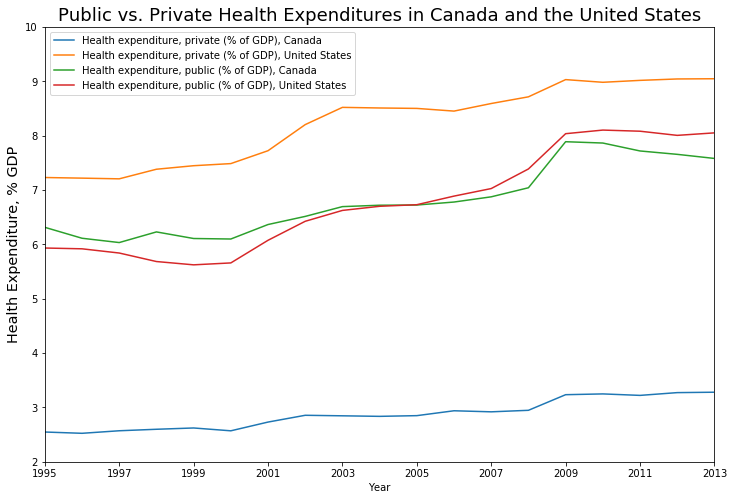

In [483]:
fig1 = df_2.unstack(level=0).plot(kind = 'line', figsize = (12, 8))
plt.ylabel('Health Expenditure, % GDP', size = 'x-large')
fontdict = {'fontsize': 18, 'fontweight': 'normal'}
plt.title('Public vs. Private Health Expenditures in Canada and the United States', fontdict = fontdict)
years = np.arange(1995, 2014, 2).tolist()
plt.xticks(years)
labels1 = ('Health expenditure, private (% of GDP), Canada', 'Health expenditure, private (% of GDP), United States',
          'Health expenditure, public (% of GDP), Canada', 'Health expenditure, public (% of GDP), United States')
plt.legend(labels = labels1)
plt.ylim(2, 10)
#plt.legend('Canda', 'US')
plt.savefig('PublicvPrivate Health ExpendituresCanUS.png')
plt.show()

*The above plot shows that although public expenditure of health is relatively similar in both Canada and the United States, private health expenditure in the United States is almost three times larger than private health expenditure in Canada*

Next step is to investigate whether this is due to difference in GDP of Canada and the United States, i.e. Canada spends less percentage of its GDP on health than the United States because Canada's GDP per Capita is a lot larger hence, total expenditure on health is eventually similar??

In [84]:
# Extract GDP per Capita of different countries to compare Canada and US GDP per Capita
GDPpC_filter = data['IndicatorName'].str.contains('GDP per capita \(current US', case = False)
df_GDP_per_Capita = data[GDPpC_filter]
df_GDP_per_Capita.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
95,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
264,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138
377,East Asia & Pacific (developing only),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,89.319639
518,Euro area,EMU,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,924.571393
624,Europe & Central Asia (all income levels),ECS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,648.223441


In [269]:
# Extract GDP per Capita for Canada and United States only
df_3 = df_GDP_per_Capita.loc[(df_GDP_per_Capita['CountryName'].isin(CanUS_filter))]
df_3.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6508,Canada,CAN,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,2294.568814
22285,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,3007.123445
30712,Canada,CAN,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,2231.293824
48762,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,3066.562869
57861,Canada,CAN,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,2255.230044


Explore Health Expenditures for countries and if there is a correlation with mortality rate

In [103]:
# Create a pivot table for Canada and US GDP per Capita to make plotting easier:
df_4 = pd.pivot_table(df_3, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
df_4.head()

Value
IndicatorName    GDP per capita (current US$)
CountryName Year                             
Canada      1960                  2294.568814
            1961                  2231.293824
            1962                  2255.230044
            1963                  2354.839122
            1964                  2529.518179

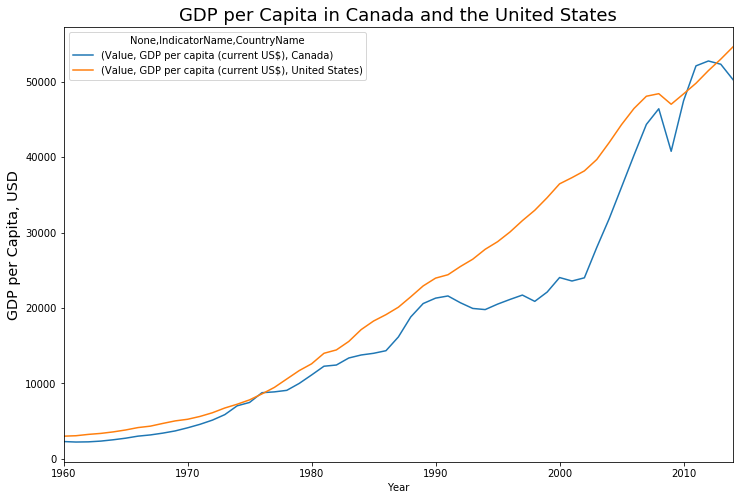

In [487]:
# Plot Canada and US GDP per Capita to find out if that is the cause of different health expenditures as percentage of GDP
fig2 = df_4.unstack(level=0).plot(kind = 'line', figsize = (12, 8))
plt.title('GDP per Capita in Canada and the United States', fontdict = fontdict)
plt.ylabel('GDP per Capita, USD', size = 'x-large')
plt.show()

*Apparently, United States GDP per Capita is higher than Canada's GDP per Capita, hence the above hypothesis is not valid, United States spend on average person same (slightly higher - given above plot) amount of public health expenditure and three times more (at least) of private health expenditure

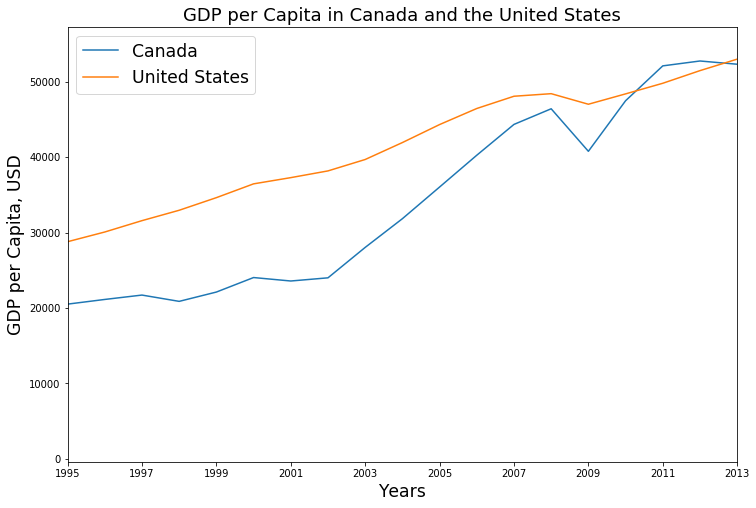

In [488]:
# Limit GDP per Capita comparison to 1995 - 2013 range to represent same years of Health Expenditures
fig3 = df_4.unstack(level=0).plot(kind = 'line', figsize = (12, 8))
plt.ylabel('GDP per Capita, USD', size = 'xx-large')
plt.xlabel('Years', size = 'xx-large')
plt.title('GDP per Capita in Canada and the United States', fontdict = fontdict)
labels2 = ('Canada', 'United States')
plt.legend(labels = labels2, fontsize = 'xx-large')
plt.xticks(years)
plt.xlim(1995, 2013)
plt.savefig('GDPperCapitaCanUS.png')
plt.show()

There was a significant gap between United States GDP per Capita and Canada GDP per Capita, as United States GDP per Capita is was ca. 25% higher than Canada GDP per Capita till around 2005, Canada GDP per Capita exceeded United States GDP per Capita in two years only, substantiates the above conclusion that United States spend on average person same (slightly higher - given above plot) amount of public health expenditure and three times more (at least) of private health expenditure.

In [259]:
# Store Canada GDP per Capita from 1995 - 2013 in an array for easier plotting
#gdp_can = df_4.xs('Canada').loc[1995:2013].values.flatten()
#gdp_can

[[1.         0.97555939]
 [0.97555939 1.        ]]


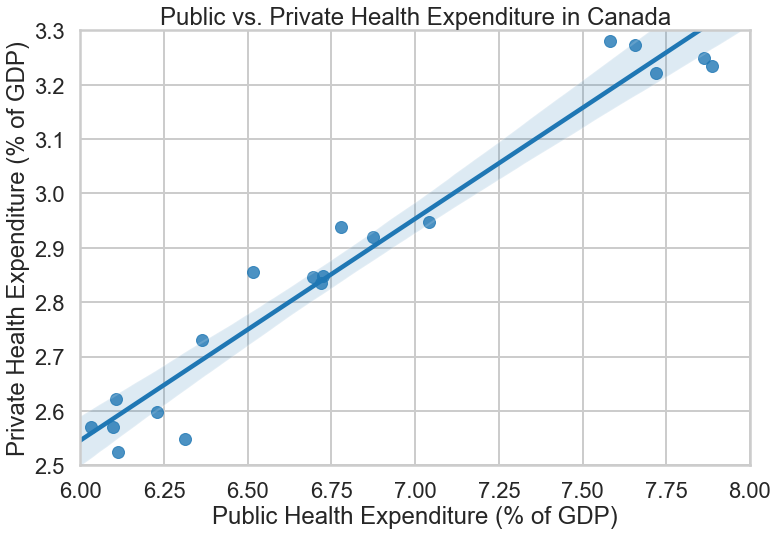

In [530]:
# Find out if there is a correlation between public and private health expenditure (Canada)
import seaborn as sns
h_public_can = df_2.loc['Canada', ('Value', 'Health expenditure, public (% of GDP)')].values
h_private_can = df_2.loc['Canada', ('Value', 'Health expenditure, private (% of GDP)')].values
plt.figure(figsize = (12, 8))
fig4 = sns.regplot(h_public_can, h_private_can)
fig4.set(xlabel = 'Public Health Expenditure (% of GDP)', ylabel = 'Private Health Expenditure (% of GDP)',
         title = 'Public vs. Private Health Expenditure in Canada')
sns.set_style('whitegrid')
sns.set_context('poster')
plt.ylim(2.5, 3.3)
plt.xlim(6, 8)
print(np.corrcoef(h_public_can, h_private_can))
plt.savefig('PublicvPrivate Health Expenditure in Canada.png')
plt.show()

There is a strong correlation between public and private health expenditure in Canada

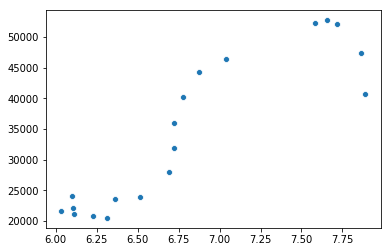

In [220]:
# Is there a correlation between public health expenditure and GDP per Capita
sns.regplot(h_public_can, gdp_can)

array([[1.        , 0.94277937],
       [0.94277937, 1.        ]])

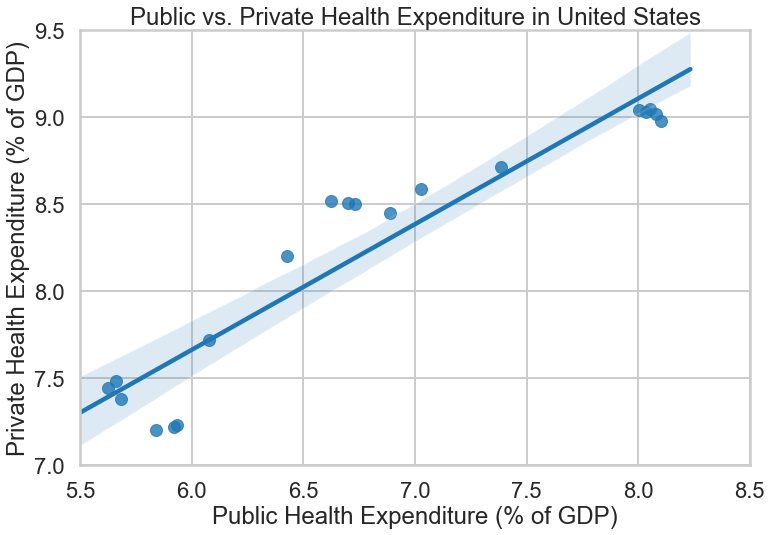

In [531]:
# Find out if there is a correlation between public and private health expenditure (United States)
h_public_us = df_2.loc['United States', ('Value', 'Health expenditure, public (% of GDP)')].values
h_private_us = df_2.loc['United States', ('Value', 'Health expenditure, private (% of GDP)')].values
plt.figure(figsize = (12, 8))
fig5 = sns.regplot(h_public_us, h_private_us)
fig5.set(xlabel = 'Public Health Expenditure (% of GDP)', ylabel = 'Private Health Expenditure (% of GDP)',
         title = 'Public vs. Private Health Expenditure in United States')
plt.ylim(7, 9.5)
plt.xlim(5.5, 8.5)
plt.savefig('PublicvPrivate Health Expenditure in US')
np.corrcoef(h_public_us, h_private_us)

There is a strong correlation between public health expenditure and private health expenditure in the United States

As GDP per Capita did not explain why there is a gap between US and Canada private health expenditure despite public health expenditure is relatively similar.

Could the reason be that there is more expenditure on medical facilities such as hospitals, and doctors.

Hence, we will compare hospital beds and physicians per 1000 people in both Canada and United States

In [285]:
Ind2_filter = ['Hospital beds (per 1,000 people)']
df_5 = df.loc[(df['CountryName'].isin(CanUS_filter)) & (df['IndicatorName'].isin(Ind2_filter))]
df_5.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6533,Canada,CAN,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,6.2
22309,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,9.2
166761,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1965,8.8
314548,Canada,CAN,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1970,7.0
358062,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1970,7.9


In [286]:
# Pivot Table to make it more convenient for plotting purposes
df_6 = pd.pivot_table(df_5, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
df_6.head()

Value
IndicatorName    Hospital beds (per 1,000 people)
CountryName Year                                 
Canada      1960                              6.2
            1970                              7.0
            1976                              6.9
            1977                              6.9
            1978                              6.9

In [287]:
# There are so many NAN values, so drop NAN values
df_6.dropna(inplace = True)
df_6.head()

Value
IndicatorName    Hospital beds (per 1,000 people)
CountryName Year                                 
Canada      1960                              6.2
            1970                              7.0
            1976                              6.9
            1977                              6.9
            1978                              6.9

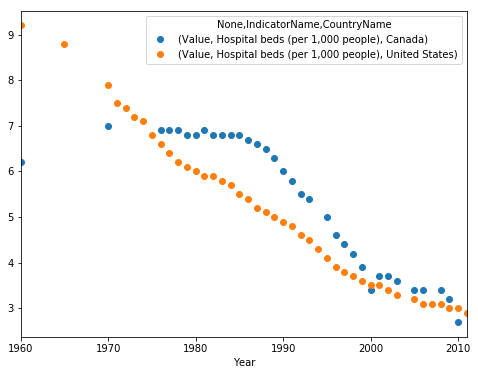

In [290]:
# plot hospital beds per 1000 people and physicians per 1000 people
df_6.unstack(level=0).plot(style = 'o', figsize = (8, 6))
plt.show()

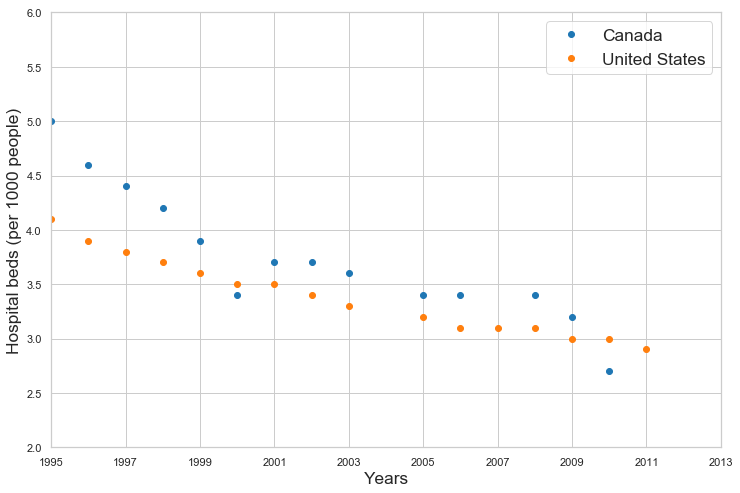

In [581]:
fig6 = df_6.unstack(level=0).plot(style = 'o', figsize = (12, 8))
fig6.set_xlim(1995, 2013)
plt.xticks(years)
plt.xlabel('Years', fontsize = 'x-large')
plt.ylabel('Hospital beds (per 1000 people)', fontsize = 'x-large')
plt.legend(labels = ('Canada', 'United States'), fontsize = 'x-large')
plt.ylim(2, 6)
plt.savefig('Hospital beds per 1000 people.png')
plt.show()

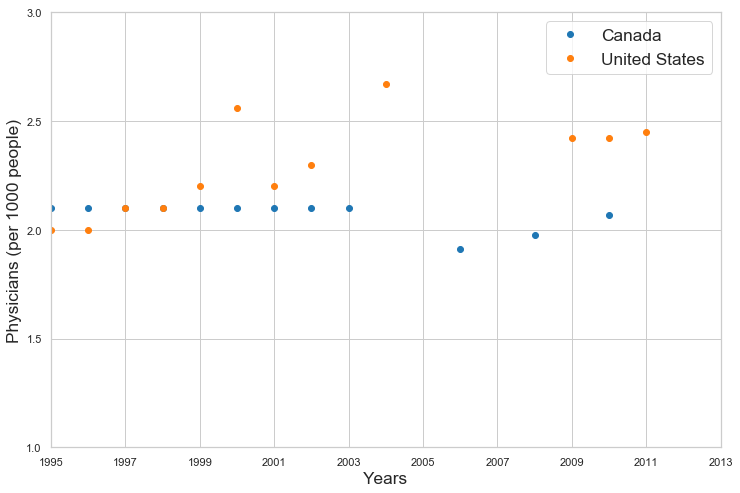

In [582]:
Ind3_filter = ['Physicians (per 1,000 people)']
df_7 = df.loc[(df['CountryName'].isin(CanUS_filter)) & (df['IndicatorName'].isin(Ind3_filter))]
df_8 = pd.pivot_table(df_7, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
fig7 = df_8.unstack(level=0).plot(style = 'o', figsize = (12, 8))
plt.xlim(1995, 2013)
plt.xticks(years)
plt.ylim(1, 3)
plt.yticks([1, 1.5, 2, 2.5, 3])
sns.set_context('notebook')
fig7.set_ylim(1, 3)
plt.xlabel('Years', fontsize = 'x-large')
plt.ylabel('Physicians (per 1000 people)', fontsize = 'x-large')
plt.legend(labels = ('Canada', 'United States'), fontsize = 'x-large')
plt.savefig('Physicians per 1000 people.png')
plt.show()

In [559]:
#fig8, subfigs = plt.subplots(1, 2, figsize = (10, 10))
#subfigs[0].plot()
#subfigs[1] = fig7
#plt.show()

For most of the studied period, Hospital beds per 1000 people  are higher in Canada than the United States whilst and physicians per 1000 people are more in the United States than in Canada, hence, the difference in total health expenditures in the United States and Canada is not attributed to more infrastructure expenditures but might be due to (or might have resulted in) more medical human resources.

**Is the health system more efficient in the United States than Canada, i.e. it leads to lower mortality rates and higher life expectancy rates?**

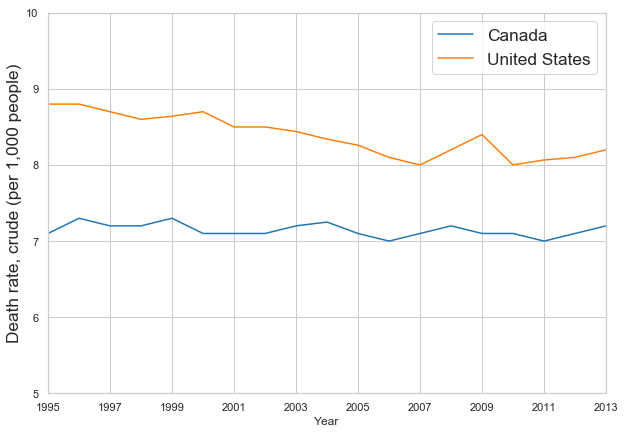

In [588]:
# There is no recovery related indicators, so, crude death rate will be used as an indicator
Ind4_filter = ['Death rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)']
df_9 = df.loc[(df['CountryName'].isin(CanUS_filter)) & (df['IndicatorName'].isin(Ind4_filter))]
df_10 = pd.pivot_table(df_9, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
fig8 = df_10.loc[:, ('Value', 'Death rate, crude (per 1,000 people)')].unstack(level=0).plot(figsize = (10, 7))
fig8.set_xlim(1995, 2013)
fig8.set_ylim(5, 10)
plt.ylabel('Death rate, crude (per 1,000 people)', fontsize = 'x-large')
plt.legend(labels = ('Canada', 'United States'), fontsize = 'x-large')
plt.xlim(1995, 2013)
plt.xticks(years)
plt.savefig('Death rate per 1000 people CanUS.png')
plt.show()

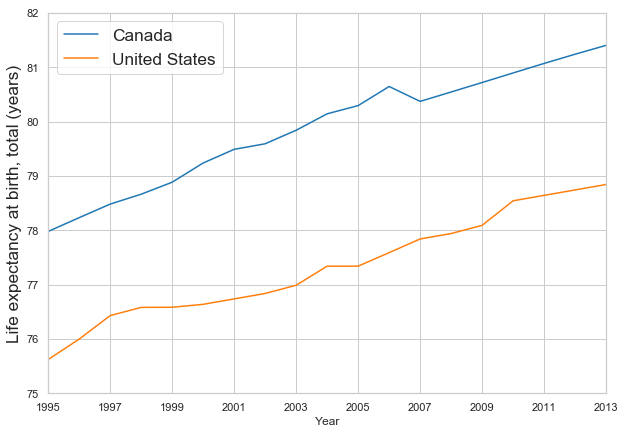

In [589]:
fig9 = df_10.loc[:, ('Value', 'Life expectancy at birth, total (years)')].unstack(level=0).plot(figsize = (10, 7))
fig9.set_xlim(1995, 2013)
plt.ylabel('Life expectancy at birth, total (years)', fontsize = 'x-large')
plt.xticks(years)
plt.legend(labels = ('Canada', 'United States'), fontsize = 'x-large')
plt.xlim(1995, 2013)
plt.ylim(75, 82)
plt.savefig('Life expectancy at birth CanUS.png')
plt.show()

Above two plots show that Life Expectancy at birth is higher in Canada than the United States, and death rate (per 1000 people) is higher in the United States than Canada.
Hence, we could conclude that higher health expenditure in the United States did not lead to higher life expectancy or lower death rate, it is not because there are more hospital beds or physicians (per 1000 people), i.e. more expenditure on infrastructure or human resources in the United States than Canada

### *More investigation could be done to find out more about this difference, that may include demographics of two countries, detailed aspects of health expenditures in two countries, prices of medical services, recovery rates, common diseases, etc.?*

*__The major difference between health systems in the United States and Canada is that health insurance is government-led in Canada whlist it is privately-led in the United States, could this be the reason of large difference in expenditure with no reflection of that difference on infrastructure or life expectancy? may be!!!__*

**Although above work shed lots of light on health expenditure and other related indicators in the United States and Canada, it did not give conclusive answer to the research question, hence more investigation will be done with more countries used as a sample, better to use one region whose countries have similar economic conditions as a sample for this investigation. Europe is a good candidate, Central Asia countries are in the group

In [342]:
Europe_filter = countries['ShortName'][countries.Region == 'Europe & Central Asia']
#Europe_filter

In [606]:
#Filter countries by high income, OECD
HighIncome_filter = countries['ShortName'][countries.IncomeGroup == 'High income: OECD']
#HighIncome_filter.drop([105], axis = 0, inplace = True)
#HighIncome_filter

In [607]:
# Create a dataframe that contains public and private health expenditures, life expectancy at birth,
#  and death rate for these high income countries

In [608]:
Ind5_filter = ['Death rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)', 'Health expenditure, public (% of GDP)', 'Health expenditure, private (% of GDP)']
df_11 = df.loc[(df['CountryName'].isin(HighIncome_filter)) & (df['IndicatorName'].isin(Ind5_filter))]
#df_11 = df.loc[(df['IndicatorName'].isin(Ind5_filter))]
df_12 = pd.pivot_table(df_11, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
df_12.head()

Value  \
IndicatorName    Death rate, crude (per 1,000 people)   
CountryName Year                                        
Australia   1960                                  8.6   
            1961                                  8.5   
            1962                                  8.7   
            1963                                  8.7   
            1964                                  9.0   

                                                         \
IndicatorName    Health expenditure, private (% of GDP)   
CountryName Year                                          
Australia   1960                                    NaN   
            1961                                    NaN   
            1962                                    NaN   
            1963                                    NaN   
            1964                                    NaN   

                                                        \
IndicatorName    Health expenditure, public (% of GDP)   
CountryName Year                                         
Australia   1960                                   NaN   
            1961                                   NaN   
            1962                                   NaN   
            1963                                   NaN   
            1964                                   NaN   

                                                          
IndicatorName    Life expectancy at birth, total (years)  
CountryName Year                                          
Australia   1960                               70.817073  
            1961                               70.973171  
            1962                               70.942439  
            1963                               70.911707  
            1964                               70.880976

In [609]:
# No health expenditure data ecist before 1995, so, it is better to remove all data before 1995, dropna is a convenient method
df_12.dropna(axis = 0, inplace = True)
df_12.head()

Value  \
IndicatorName    Death rate, crude (per 1,000 people)   
CountryName Year                                        
Australia   1995                                  6.9   
            1996                                  7.0   
            1997                                  7.0   
            1998                                  6.8   
            1999                                  6.8   

                                                         \
IndicatorName    Health expenditure, private (% of GDP)   
CountryName Year                                          
Australia   1995                               2.483451   
            1996                               2.585597   
            1997                               2.481521   
            1998                               2.576891   
            1999                               2.461520   

                                                        \
IndicatorName    Health expenditure, public (% of GDP)   
CountryName Year                                         
Australia   1995                              4.773212   
            1996                              4.854163   
            1997                              5.013989   
            1998                              5.082354   
            1999                              5.324091   

                                                          
IndicatorName    Life expectancy at birth, total (years)  
CountryName Year                                          
Australia   1995                               77.829268  
            1996                               78.078049  
            1997                               78.480488  
            1998                               78.631707  
            1999                               78.931707

In [610]:
# Create a new column for total health expenditure
df_12.loc[:, ('Value', 'Total Health Expenditure(% of GDP)')] = df_12.loc[:, ('Value', 'Health expenditure, public (% of GDP)')] + df_12.loc[:, ('Value', 'Health expenditure, private (% of GDP)')]
df_12.head()

Value  \
IndicatorName    Death rate, crude (per 1,000 people)   
CountryName Year                                        
Australia   1995                                  6.9   
            1996                                  7.0   
            1997                                  7.0   
            1998                                  6.8   
            1999                                  6.8   

                                                         \
IndicatorName    Health expenditure, private (% of GDP)   
CountryName Year                                          
Australia   1995                               2.483451   
            1996                               2.585597   
            1997                               2.481521   
            1998                               2.576891   
            1999                               2.461520   

                                                        \
IndicatorName    Health expenditure, public (% of GDP)   
CountryName Year                                         
Australia   1995                              4.773212   
            1996                              4.854163   
            1997                              5.013989   
            1998                              5.082354   
            1999                              5.324091   

                                                          \
IndicatorName    Life expectancy at birth, total (years)   
CountryName Year                                           
Australia   1995                               77.829268   
            1996                               78.078049   
            1997                               78.480488   
            1998                               78.631707   
            1999                               78.931707   

                                                     
IndicatorName    Total Health Expenditure(% of GDP)  
CountryName Year                                     
Australia   1995                           7.256663  
            1996                           7.439760  
            1997                           7.495510  
            1998                           7.659245  
            1999                           7.785612

In [620]:
# Find if there is a correlation between different indicators
df_12.corr()
df_12.corr().to_csv('High Income OECD Correlations Table.csv')

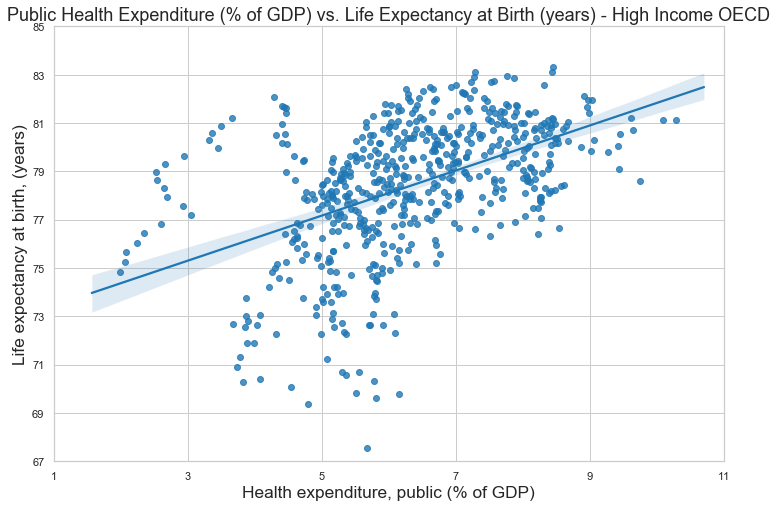

In [618]:
public_health_oecd = df_12.loc[:, ('Value', 'Health expenditure, public (% of GDP)')].values
life_exp_oecd = df_12.loc[:, ('Value', 'Life expectancy at birth, total (years)')].values
plt.figure(figsize = (12, 8))
fig10 = sns.regplot(public_health_oecd, life_exp_oecd)
#plt.ylim(65, 85)
#plt.yticks(np.arange(65, 5, 85))
plt.ylabel('Life expectancy at birth, (years)', fontsize = 'x-large')
plt.xlabel('Health expenditure, public (% of GDP)', fontsize = 'x-large')
plt.ylim(67, 85)
plt.yticks(np.arange(67, 86, 2).tolist())
plt.xticks(np.arange(1, 12, 2).tolist())
plt.title('Public Health Expenditure (% of GDP) vs. Life Expectancy at Birth (years) - High Income OECD', fontdict = fontdict)
plt.savefig('Public Health Expenditure v Life Expectancy')
plt.show()

***Correlation Coefficient values between different indicators show that there is a moderate correlation between public health expenditure and life expectancy, whereas there is weak to no correlation between private health expenditure and life expectancy***

- On the other hand, there is no correlation between death rate and public health expenditure, whilst there is a weak negative correlation between death rate and private health expenditure.

In [623]:
LowIncome_filter = countries['ShortName'][countries.IncomeGroup == 'Low income']
df_13 = df.loc[(df['CountryName'].isin(LowIncome_filter)) & (df['IndicatorName'].isin(Ind5_filter))]
df_14 = pd.pivot_table(df_13, values = ['Value'], index = ['CountryName', 'Year'], columns = ['IndicatorName'])
df_14.head()

Value  \
IndicatorName    Death rate, crude (per 1,000 people)   
CountryName Year                                        
Afghanistan 1960                               32.403   
            1961                               31.902   
            1962                               31.415   
            1963                               30.937   
            1964                               30.464   

                                                         \
IndicatorName    Health expenditure, private (% of GDP)   
CountryName Year                                          
Afghanistan 1960                                    NaN   
            1961                                    NaN   
            1962                                    NaN   
            1963                                    NaN   
            1964                                    NaN   

                                                        \
IndicatorName    Health expenditure, public (% of GDP)   
CountryName Year                                         
Afghanistan 1960                                   NaN   
            1961                                   NaN   
            1962                                   NaN   
            1963                                   NaN   
            1964                                   NaN   

                                                          
IndicatorName    Life expectancy at birth, total (years)  
CountryName Year                                          
Afghanistan 1960                               32.328512  
            1961                               32.777439  
            1962                               33.219902  
            1963                               33.657878  
            1964                               34.092878

In [626]:
df_14.dropna(axis = 0, inplace = True)
df_14.loc[:, ('Value', 'Total Health Expenditure(% of GDP)')] = df_14.loc[:, ('Value', 'Health expenditure, public (% of GDP)')] + df_14.loc[:, ('Value', 'Health expenditure, private (% of GDP)')]
df_14.corr().to_csv('Low Income OECD Correlations Table.csv')
df_14.corr()

Value  \
IndicatorName                                 Death rate, crude (per 1,000 people)   
      IndicatorName                                                                  
Value Death rate, crude (per 1,000 people)                                1.000000   
      Health expenditure, private (% of GDP)                              0.132567   
      Health expenditure, public (% of GDP)                              -0.100433   
      Life expectancy at birth, total (years)                            -0.970862   
      Total Health Expenditure(% of GDP)                                  0.065096   

                                                                                      \
IndicatorName                                 Health expenditure, private (% of GDP)   
      IndicatorName                                                                    
Value Death rate, crude (per 1,000 people)                                  0.132567   
      Health expenditure, private (% of GDP)                                1.000000   
      Health expenditure, public (% of GDP)                                 0.060784   
      Life expectancy at birth, total (years)                              -0.103631   
      Total Health Expenditure(% of GDP)                                    0.880189   

                                                                                     \
IndicatorName                                 Health expenditure, public (% of GDP)   
      IndicatorName                                                                   
Value Death rate, crude (per 1,000 people)                                -0.100433   
      Health expenditure, private (% of GDP)                               0.060784   
      Health expenditure, public (% of GDP)                                1.000000   
      Life expectancy at birth, total (years)                              0.077984   
      Total Health Expenditure(% of GDP)                                   0.527248   

                                                                                       \
IndicatorName                                 Life expectancy at birth, total (years)   
      IndicatorName                                                                     
Value Death rate, crude (per 1,000 people)                                  -0.970862   
      Health expenditure, private (% of GDP)                                -0.103631   
      Health expenditure, public (% of GDP)                                  0.077984   
      Life expectancy at birth, total (years)                                1.000000   
      Total Health Expenditure(% of GDP)                                    -0.051138   

                                                                                  
IndicatorName                                 Total Health Expenditure(% of GDP)  
      IndicatorName                                                               
Value Death rate, crude (per 1,000 people)                              0.065096  
      Health expenditure, private (% of GDP)                            0.880189  
      Health expenditure, public (% of GDP)                             0.527248  
      Life expectancy at birth, total (years)                          -0.051138  
      Total Health Expenditure(% of GDP)                                1.000000

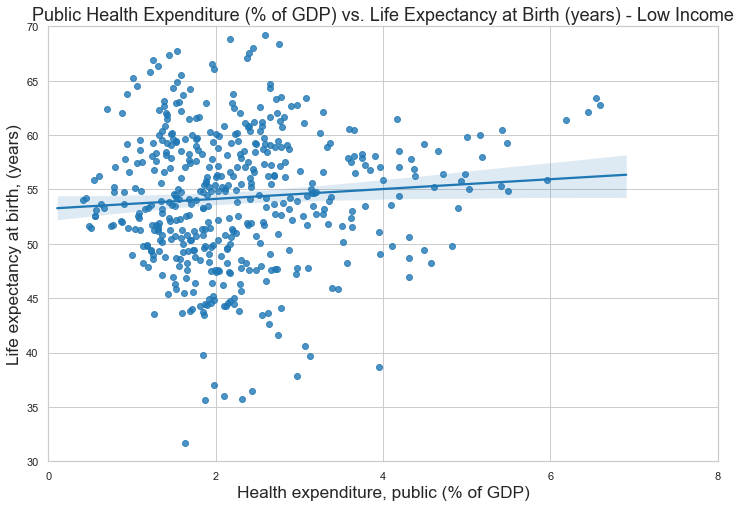

In [633]:
public_health_lowincome = df_14.loc[:, ('Value', 'Health expenditure, public (% of GDP)')].values
life_exp_lowincome = df_14.loc[:, ('Value', 'Life expectancy at birth, total (years)')].values
plt.figure(figsize = (12, 8))
fig11 = sns.regplot(public_health_lowincome, life_exp_lowincome)
#plt.ylim(65, 85)
#plt.yticks(np.arange(65, 5, 85))
plt.ylabel('Life expectancy at birth, (years)', fontsize = 'x-large')
plt.xlabel('Health expenditure, public (% of GDP)', fontsize = 'x-large')
plt.ylim(30, 70)
plt.yticks(np.arange(30, 71, 5).tolist())
plt.xticks(np.arange(0, 9, 2).tolist())
plt.title('Public Health Expenditure (% of GDP) vs. Life Expectancy at Birth (years) - Low Income', fontdict = fontdict)
plt.savefig('Public Health Expenditure v Life Expectancy - Low Income')
plt.show()

No correlation exists between death rate and life expectancy in low income countries and health expenditure.

#### To conclude, there is a correlation between public health expenditure and life expectancy in high income OECD countries, whilst correlation does not mean causation, work could be completed to investigate efficiency of private vs. public health expenditures (health insurance systems).